### Heart disease prediction - Kaggle dataset
<br><br />
#### Gradient Boost Classification model
In this part of the project we train a Gradient Boost tree-based model and try to predict heart disease. We continue our comparison with previously used decision tree and Random Forest models. The Gradient Boost algorithm is different from the Random Forest in that it uses the performance of a tree to build the next tree, whereas the Random Forest (as the name suggests) creates random selec<br><br />

In [4]:
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics

from sklearn.ensemble import GradientBoostingClassifier as gbc

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
# -- import cleaned data --
df = pd.read_csv('heart_dumm_clean.csv')
df.describe()

,Unnamed: 0,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,...,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,746.00000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,...,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,372.50000,52.882038,133.022788,244.635389,0.167560,140.226542,0.384718,0.901609,0.477212,0.243968,...,0.495979,0.222520,0.226542,0.054960,0.235925,0.596515,0.167560,0.057641,0.474531,0.467828
std,215.49594,9.505888,17.282750,59.153524,0.373726,24.524107,0.486855,1.072861,0.499816,0.429762,...,0.500319,0.416218,0.418874,0.228055,0.424860,0.490926,0.373726,0.233219,0.499686,0.499299
min,0.00000,28.000000,92.000000,85.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,186.25000,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,372.50000,54.000000,130.000000,237.000000,0.000000,140.000000,0.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,558.75000,59.000000,140.000000,275.000000,0.000000,160.000000,1.000000,1.500000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,745.00000,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
# -- creating input and target data for model training/testing --
dfin = df.copy().drop(['Unnamed: 0', 'HeartDisease'], axis='columns')
dfout = df.copy()['HeartDisease']

<br><br />
Just as we did for decision tree and Random Forest models, we create input and target data for training, split it while stratifing with *Sex_F* to deal with inbalanced data, and train a Gradient Boost model.<br><br />

In [18]:
# -- define gradient boost model and train --
print('-- GRADIENT BOOST --')
RS = 50
X_train, X_test, y_train, y_test = train_test_split(dfin, dfout, test_size=0.3, stratify=dfin['Sex_F'], 
                                          random_state=RS)

gbmod = gbc(loss='deviance', n_estimators=30, 
          learning_rate=0.1, max_depth=7,
          random_state=RS, subsample=0.7,
          max_features='sqrt')
gbmod.fit(X_train, y_train)

print('Model Train Accuracy: ', round(gbmod.score(X_train, y_train),4))
print('Model Test Accuracy: ', round(gbmod.score(X_test, y_test),4))

y_predict_test = gbmod.predict(X_test)
print(' Confusion matrix: \n', metrics.confusion_matrix(y_test, y_predict_test))

crsv = cross_val_score(gbmod, dfin, dfout, cv = 7)
print('Cross validation mean scores: ', round(crsv.mean(),4))
print('Cross validation std dev: ', round(crsv.std(),4))

-- GRADIENT BOOST --
Model Train Accuracy:  0.9923
Model Test Accuracy:  0.875
 Confusion matrix: 
 [[99 17]
 [11 97]]
Cross validation mean scores:  0.867
Cross validation std dev:  0.0667


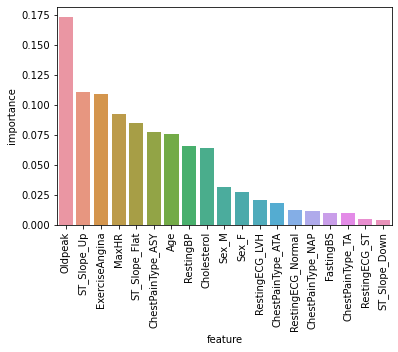

In [19]:
# -- feature importance --
imp_df = pd.DataFrame({'feature': X_train.columns, 'importance' : gbmod.feature_importances_})
imp_df.sort_values('importance', ascending=False, inplace = True)

sns.barplot(x='feature', y='importance', data=imp_df)
plt.xticks(rotation=90)
plt.show()


<br><br />
Looking at the important features we can observe that the top features are almost identical to the tuned Random Forest model, with changes in level of importance. This highlights that although both the methods are able to capture the importance of features (or attributes) well enough to provide a prediction model, they still vary in how the algorithm uses these features, hence the difference.<br><br />

In [20]:
# -- tuning gradient boost model --
parameters = {'max_depth':[5,6,7,8,9], 'n_estimators':[10,30,50,70,90],
             'learning_rate':[0.05,0.1,0.2]}
clf = GridSearchCV(gbmod, parameters)
clf.fit(dfin, dfout)
print(clf.best_params_)

{'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 70}


In [21]:
print('-- GRADIENT BOOST (TUNED)--')
gbmod = gbc(loss='deviance', n_estimators=clf.best_params_['n_estimators'], 
          learning_rate=clf.best_params_['learning_rate'], max_depth=clf.best_params_['max_depth'],
          random_state=RS, subsample=0.7,
          max_features='sqrt')
gbmod.fit(X_train, y_train)

print('Model Train Accuracy: ', round(gbmod.score(X_train, y_train),4))
print('Model Test Accuracy: ', round(gbmod.score(X_test, y_test),4))

y_predict_test = gbmod.predict(X_test)
print(' Confusion matrix: \n', metrics.confusion_matrix(y_test, y_predict_test))

crsv = cross_val_score(gbmod, dfin, dfout, cv = 7)
print('Cross validation mean scores: ', round(crsv.mean(),4))
print('Cross validation std dev: ', round(crsv.std(),4))

-- GRADIENT BOOST (TUNED)--
Model Train Accuracy:  1.0
Model Test Accuracy:  0.8571
 Confusion matrix: 
 [[98 18]
 [14 94]]
Cross validation mean scores:  0.8737
Cross validation std dev:  0.0611


<br><br />
The tuned Gradient Boost model is almost similar to the tuned Random Forest although there is slight improvement in the CV scores. The current stats for model performance are:<br><br />

| Model | Train score | Test score | CV score | CV std |
| --- | --- | --- | --- | --- |
| **Decision Tree** | 96 % | 82.6 % | 82.5 % | 7.9 % |
| **Random Forest (tuned)** | 94.4 % | 85.7 % | 86.8 % | 6.5 % |
| **Gradient Boost (tuned)** | 100 % | 85.7 % | 87.4 % | 6.1 % |